# Cottrell Simulations
Based on the Fortran code found in appendix B of "Electrochemical Methods: Second Edition" by Bard and Faulkner.

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Constants 
l = 100
DMA = 0.40
DMB = DMA
k_iter = 100

fa_old = np.ones(100)
fa_new = np.ones(100)
fb_old = np.zeros(100)
fb_new = np.zeros(100)

In [99]:

Z = np.zeros(l)
T = np.zeros(l)
concentration_a = np.zeros(l)
concentration_b = np.zeros(l)

for k in range(0, k_iter):

    T[k]=(k-0.5)/l

    #Diffusion Into the First Box
    fa_new[0] = fa_old[0] + DMA*(fa_old[1]-fa_old[0])
    fb_new[0] = fb_old[0] + DMA*(fb_old[1]-fb_old[0])

    J_max = 4.2*np.sqrt(k)
    #Diffusion beyond the first box
    for j in range(1, int(J_max)):
        fa_new[j] = fa_old[j]+DMA*(fa_old[j-1]-2*fa_old[j]+fa_old[j+1])
        fb_new[j] = fb_old[j]+DMA*(fb_old[j-1]-2*fb_old[j]+fb_old[j+1])

    #Faradaic Conversion and Current Flow
    Z[k] = np.sqrt(l/DMA)*fa_new[0]
    fb_new[0] = fb_new[0]+fa_new[0]
    fa_new[0] = 0

    for j in range(0, int(J_max)):
        X = (j-1)/np.sqrt(DMA*l)

    for j in range(0, int(J_max)):
        fa_old[j]=fa_new[j]
        fb_old[j] =fb_new[j]

    # if k == 50:
    #     concentration_a[j] = fa_new[j]
    #     concentration_b[j] = fb_new[j]


Zcott=1/np.sqrt(np.pi*T)
R = Z/Zcott


/var/folders/v5/vj19y2_90_n_906sz5k9d6xc0000gq/T/ipykernel_18116/546944133.py:37: RuntimeWarning: invalid value encountered in sqrt
  Zcott=1/np.sqrt(np.pi*T)


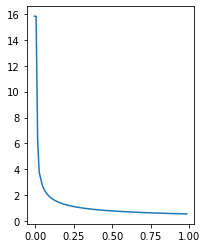

In [100]:
fig = plt.figure(figsize = (3,4))

plt.plot(T,Z)
